In [1]:
%matplotlib inline 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import glob
import random
import re
import time
import math
import os
import sys
from sklearn.utils import shuffle

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy

Using TensorFlow backend.


In [2]:
import importlib
sys.path.append('..')
import Shared  # Shared.py holds functions common to all notebooks
importlib.reload(Shared)  # In case you make changes to the Shared.py file and don't want to restart the nb kernel 

<module 'Shared' from '/home/eduardo/Desktop/Link to dynamic-projections/Models/Shared.py'>

In [3]:
nb_name = 'fashion-AE_784f_500f_500f_2000f_2f_40ep'  # Couldn't figure out how to get this automatically

In [5]:
X, info_df, n_revisions, CATEGORIES = Shared.load_drawings('../../Datasets/fashion/')
# Flatten Nx28x28 -> Nx784x1
N = len(X)
# np.reshape(X, (len(X), 1, 784))
X_flat = np.reshape(np.ravel(X), (N, -1))
len(X), len(info_df), n_revisions, CATEGORIES

(10000,
 10000,
 10,
 {0: 'ankleboot',
  1: 'bag',
  2: 'coat',
  3: 'dress',
  4: 'pullover',
  5: 'sandal',
  6: 'shirt',
  7: 'sneaker',
  8: 'trouser',
  9: 'tshirt'})

In [6]:
info_df.head()

,X_index,drawing_cat_id,drawing_cat_str,drawing_id,t
0,0,9,tshirt,687,3
1,1,0,ankleboot,596,0
2,2,2,coat,589,8
3,3,5,sandal,399,1
4,4,2,coat,12,3


In [7]:
n = X_flat.shape[1]
ae = Sequential()
ae.add(Dense(500, activation='relu', input_shape=(n,)))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(2000, activation='relu'))
ae.add(Dense(2))
ae.add(Dense(2000, activation='relu'))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(n))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
ae.compile(loss='mse', optimizer='adam')

In [9]:
%time ae.fit(X_flat, X_flat, nb_epoch=40)

Instructions for updating:
Use tf.cast instead.


/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/40
10000/10000 [==============================] - 28s 3ms/step - loss: 0.0773
Epoch 2/40
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0652
Epoch 3/40
10000/10000 [==============================] - 27s 3ms/step - loss: 0.0635
Epoch 4/40
10000/10000 [==============================] - 27s 3ms/step - loss: 0.0632
Epoch 5/40
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0625
Epoch 6/40
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0617
Epoch 7/40
10000/10000 [==============================] - 25s 3ms/step - loss: 0.0614
Epoch 8/40
10000/10000 [==============================] - 23s 2ms/step - loss: 0.0609
Epoch 9/40
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0606
Epoch 10/40
10000/10000 [==============================] - 25s 3ms/step - loss: 0.0599
Epoch 11/40
10000/10000 [==============================] - 24s 2ms/step - loss: 0.0601
Epoch 12/40
10000/10000 [===========================

In [10]:
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4002      
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              6000      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
__________

In [ ]:
# ae.save('../Models/{}.h5'.format(nb_name))

Text(0.5, 0.98, 'loss')

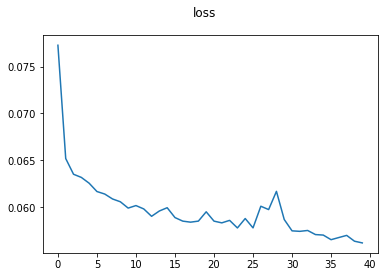

In [11]:
plt.figure()
plt.plot(ae.history.history['loss'])
plt.suptitle('loss')

In [13]:
Shared.save_drawing_activations(ae, X_flat, info_df, n_revisions, nb_name)

True